# <center> Домашнее задание 4 </center>

## 1. Матрица Тёплица (30 баллов)

1. Напишите функцию, которая на вход принимает вектор уникальных значений {$a_{n-1},  \dots, a_{0}, \dots, a_{-(n+1)}$} и размер матрицы, а выдает сгенерированную на основании этих значений [матрицу Тёплица](https://en.wikipedia.org/wiki/Toeplitz_matrix). В решении нельзя использовать готовые реализации из ```scipy.linalg``` или других библиотек, но необходимо использовать ```numpy```. 
2. Напишите функцию, которая принимает на вход матрицу размера $N \times N$ и проверяет, является ли она матрицей Тёплица. Функция должна вернуть в ответе булевое значение (```True``` или ```False```). 

In [1]:
import numpy as np
def fun(lis, n):
    final = []
    # будем двигать список впрво и заполнять двумерный массив
    for i in range(n):
       final.append(lis[n-i-1:len(lis)-i])
    # переведем получившийся список списков в нампи массив
    final_q = np.asarray(final)
    return print(final_q)
    
fun(list(map(int, input().split())), int(input()))

 1 2 3
 2


[[2 3]
 [1 2]]


In [10]:
def fun2(a):
    # Смотрим размер матрицы 
    n = a.shape[0]
    # устанавливаем флаг
    flag = True
    # запускаем поэлементную проверку, чтобы значения на диагоналях с наклоном, что и у главной диагонали, совпадали
    for i in range(1,n-1):
        for j in range(1,n-1):
            if a[i][j] != a[i+1][j+1]:
                flag = False
    return flag

# так как сказано, что функция принимает на вход матрицу,то будем считать, что matrix является массивом в нампи    
fun2(matrix)
    

 5
 1 2 3 4 5
 6 1 2 3 4
 7 6 1 2 3
 8 7 6 1 2
 9 8 7 6 1


True

## 2. Ищем лучшую однушку на ЦИАНе (35 баллов)

В этом задании будем скачивать объявления о продаже однокомнатных квартир в Москве c [ЦИАНа](https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p=1&region=1&room1=1) и выберем самую понравившуюся из них! :3

1. Напишите функцию, которая парсит все объявления с одной страницы и по каждому из них сохраняет ссылку (href) на объявление с более подробной информацией. Примените эту функцию для первых 10 страниц, сохранив все href в одном списке. Если хотите собрать полную информацию и не боитесь быть забаненными, можете скачать все 54 страницы.

2. Напишите функцию, которая для каждой (href) страницы с объявлением квартиры качает и сохраняет: 
* **Общую стоимость**
* **Адрес**
* **Ближайшее метро**
* **Тип жилья**
* **Площадь комнат**
* **Этаж**
* **Срок сдачи**

Сохраните эту информацию в DataFrame.

3. Избавьтесь от лишних символов в колонках с ценой квартиры, этажом и площадью комнат, приведя их к числову типу. Определите пороги по этим переменным, ниже или выше которых вы будете считать это жилье неподходящим. Например, цена не более 15 миллионов, этаж не ниже 2, общая площадь не менее 40 $м^2$. Можете выбрать другие наиболее важные для вас критерии, всего их должно быть не меньше 3. 
Отфильтруйте DataFrame, оставив только те объявления, которые удовлетворяют условиям. Отсортируйте оставшиеся объявления по возрастанию цены и отобразить топ-10 финальных кандидатов. Понравилась какая-нибудь квартира из них? :) 

In [ ]:
!pip install fake-useragent
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import requests
import numpy as np
import pandas as pd 
import time 
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

# чтобы быть похожим на человека и у сервера небыло подозрений используем User Agent
UserAgent().chrome
all_hrefs = []
def getlinks(page):
    time.sleep(1)
    link = 'https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p={}&region=1&room1=1'.format(page)
    response = requests.get(link, headers={'User-Agent': UserAgent().chrome})
    # проверяем на возможность отклонения запроса на доступ
    if not response.ok:
        return []
    html = response.content
    # собираем суп
    soup = BeautifulSoup(html,'html.parser')
    hrefs = soup.findAll('a', attrs = {'class':"_93444fe79c--link--39cNw"})
    # добавлем все ссылки с одной страницы в список
    hrefs = [l.attrs['href'] for l in hrefs]
    return hrefs


for i in range(1, 11):
    h = getlinks(i)
    for j in range(len(h)):
        all_hrefs.append(h[j])
all_hrefs

['https://www.cian.ru/sale/flat/246110801/',
 'https://www.cian.ru/sale/flat/236260733/',
 'https://www.cian.ru/sale/flat/220614116/',
 'https://www.cian.ru/sale/flat/245966788/',
 'https://www.cian.ru/sale/flat/245966501/',
 'https://www.cian.ru/sale/flat/245469335/',
 'https://www.cian.ru/sale/flat/242203837/',
 'https://www.cian.ru/sale/flat/245914584/',
 'https://www.cian.ru/sale/flat/245614369/',
 'https://www.cian.ru/sale/flat/244508951/',
 'https://www.cian.ru/sale/flat/240492677/',
 'https://www.cian.ru/sale/flat/235896822/',
 'https://www.cian.ru/sale/flat/246575314/',
 'https://www.cian.ru/sale/flat/242784258/',
 'https://www.cian.ru/sale/flat/246682195/',
 'https://www.cian.ru/sale/flat/226417873/',
 'https://www.cian.ru/sale/flat/222683840/',
 'https://www.cian.ru/sale/flat/237963448/',
 'https://www.cian.ru/sale/flat/239156853/',
 'https://www.cian.ru/sale/flat/244369079/',
 'https://www.cian.ru/sale/flat/240723855/',
 'https://www.cian.ru/sale/flat/246502485/',
 'https://

In [3]:
import time
def po_Kvartire(linker):
    # словарь
    time.sleep(0.3)
    collected_data = {}
    
    # загружаем ссылку для доступа информации к одной кваритире
    UserAgent().chrome
    response = requests.get(linker, headers={'User-Agent': UserAgent().chrome})
    html = response.content
    soup = BeautifulSoup(html,'html.parser')
    
    # находим цену по соответсвующему классу и очищаем от мусора
    try:
        price = soup.find('span', attrs={'class':'a10a3f92e9--price_value--1iPpd'}).find('span').text
        price = int(price.replace('\xa0', '')[:-1])
        collected_data['Цена'] = price
    except:
        collected_data['Цена'] = np.nan
        
    # достаём адрес
    try:
        addres = soup.find('address', attrs={'class':'a10a3f92e9--address--140Ec'}).text[:-8]
        collected_data['Адрес'] = addres
    except:
        collected_data['Адрес'] = np.nan
        

    # ближайшее метро
    metro_list = []
    try:
        metro = soup.findAll('a', attrs={'class':'a10a3f92e9--underground_link--AzxRC'})
        for i in range(len(metro)):
            metro_list.append(metro[i].text)
        metro = ','.join(metro_list)
        collected_data['Метро'] = metro
    except:
        collected_data['Метро'] = np.nan

    # тип жилья
    try:
        type_apartaments = soup.find('span', attrs={'class':'a10a3f92e9--value--3Ftu5'}).text.split()[0]
        collected_data['Тип жилья'] = type_apartaments
    except:
        collected_data['Тип жилья'] = np.nan
        
    # площадь жилья
    # сразу перейдем к вещественному типу данных
    try:
        square =  soup.find('div', attrs={'class':'a10a3f92e9--info-value--18c8R'}).text.split()[0]
        collected_data['Площадь'] = float(square.replace(',','.'))
    except:
        collected_data['Площадь'] = np.nan

    # этаж
    # поскольку у этажа нет конкретной позиции, то мы не можем как в предыдущем пункте взять значение по индексу
    # придется перебирать значения списка
    list_data = []
    floor_number = 0
    try:
        data =  soup.findAll('div', attrs={'class':'a10a3f92e9--info--3XiXi'})
        for i in range(len(data)):
            list_data.append(data[i].text)
            if 'Этаж' in list_data[i]:
                floor_number = list_data[i].split()[0]
        collected_data['Этаж'] = int(floor_number)
    except:
        collected_data['Этаж'] = np.nan

    # срок сдачи
    sdacha = 0
    try:
        for i in range(len(data)):
            list_data.append(data[i].text)
            if 'Срок сдачи' in list_data[i]:
                sdacha = list_data[i].replace('Срок сдачи', '')
        collected_data['Срок сдачи'] = sdacha
    except:
        collected_data['Срок сдачи'] = np.nan

    return collected_data

spisok_dict = []
n = len(all_hrefs)
for i in range(n):
    spisok_dict.append(po_Kvartire(all_hrefs[i]))

In [4]:
# переведем список словарей в дата фрейм и оставим только значимые квартиры с помощью query
df = pd.DataFrame(spisok_dict)
filt = df.query('15<Этаж <25 and Цена < 100000000 and 30<Площадь<50')
# отсортируем по возрастанию цены
filt = filt.sort_values(by=['Цена'])
filt.head(10)

,Цена,Адрес,Метро,Тип жилья,Площадь,Этаж,Срок сдачи
168,7300000.0,"Москва, ЮВАО, р-н Некрасовка, ул. Маршала Ерем...","Некрасовка,Лухмановская,Улица Дмитриевского",Вторичка,31.0,16,0
207,7800000.0,"Москва, ЮАО, р-н Орехово-Борисово Южное, ул. Г...","Домодедовская,Зябликово,Красногвардейская",Вторичка,35.1,16,0
130,8000000.0,"Москва, ЮАО, р-н Орехово-Борисово Южное, ул. Г...","Домодедовская,Зябликово,Красногвардейская",Вторичка,35.1,16,0
244,8171300.0,"Москва, СЗАО, р-н Щукино, Волоколамское ш., 24к2","Стрешнево,Покровское-Стрешнево,Щукинская",Новостройка,41.0,24,1 кв. 2023
80,8420000.0,"Москва, ЗАО, р-н Солнцево, Производственная ул...","Боровское шоссе,Новопеределкино,Солнцево",Вторичка,38.0,17,0
7,8985600.0,"Москва, СВАО, р-н Отрадное, Сигнальный проезд,...","Владыкино,Отрадное,Ботанический сад",Новостройка,41.6,24,4 кв. 2022
4,11113008.0,"Москва, ЮАО, р-н Даниловский, Автозаводская ул...","ЗИЛ,Технопарк,Автозаводская",Вторичка,38.1,17,0
178,11214440.0,"Москва, СВАО, р-н Лосиноостровский, Янтарный п...","Бабушкинская,Медведково,Свиблово",Новостройка,49.1,16,3 кв. 2021
43,12650000.0,"Москва, СЗАО, р-н Хорошево-Мневники, ул. Народ...","Хорошево,Октябрьское поле,Зорге",Вторичка,37.6,16,0
231,12768000.0,"Москва, СЗАО, р-н Покровское-Стрешнево, ул. Ци...","Тушинская,Спартак,Щукинская",Вторичка,48.0,16,0



## 3. Дефолты (35 баллов)

Судя по стоимости недвижимости в Москве, придется влезть в долги... Проанализируем, как часто люди не отдают ипотеки и кредиты! 

В файле ```defaults.csv``` предоставлены данные, которые можно использовать для анализа клиентской базы, предсказания дефолта, кредитного скоринга (т.е. для оценки кредитных рисков клиентов). 

Переменные:
* **ID** - идентификатор клиента;
* **LIMIT_BAL** - сумма предоставленного кредита/ипотеки (в долларах);
* **SEX** - пол (1=мужской, 2=женский);
* **EDUCATION** - уровень образования (1=научная степень, 2=высшее, 3=среднее, 4=другое, 5 и 6=неизвестно);
* **MARRIAGE** - семейное положение (1=женат/замужем, 2=холост/незамужняя, 3=другое);
* **AGE** - возраст (в годах);
* **PAY_0** - Статус погашения кредита в сентябре (-1 = надлежащая оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца, ... 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более). **PAY_2, PAY_3, ..., PAY_6** - в августе, июле, июне, мае и апреле соответственно;
* **BILL_AMT1** - Сумма выписки по счету в сентябре (в долларах). **BILL_AMT2, BILL_AMT3, ..., BILL_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **PAY_AMT1** - Сумма предыдущего платежа в сентябре (в долларах). **PAY_AMT1, PAY_AMT2, ..., PAY_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **default.payment.next.month**: произошел дефолт (1=да, 0=нет).

Нужно проанализировать набор данных банка, выполнив следующие задания:
1. Загрузить данные и преобразуйте в pd.DataFrame. Какого размера этот датасет? Посмотрите на первые 10 строк ваших данных. С помощью ```random.randint()``` в диапазоне значений индексов строк сгенерируйте случайное число $N$ и верните строки из датафрейма по индексам от $N$ до $N + 20$.<br>
2. Отобразите количество пропущенных значений во всех колонках.  <br>
3. Выведите количество уникальных клиентов в датасете, покажите не менее 2 разных способов это сделать. <br>
4. Проверьте, есть ли среди клиентов дисбаланс в количестве женщин и мужчин? Какого их соотношение (в процентах)? <br>
5. Создайте новую переменную **AGE_BINS** с категориями по переменной возраст (= возрастными диапазонами). Постройте и сравните графики распределения клиентов по значениям переменных *AGE* и *AGE_BINS*. Клиенты каких возрастов чаще всего приходят за кредитом в этот банк? Есть ли преимущество использования переменной c категориям? <br>
6. Выведите общее количество клиентов с дефолтом и без него. Постройте гистограмму с процентным отношением этих групп. Как можно оценить, велика ли полученная доля клиентов с дефолтом? <br>
7. Постройте гистограмму и график плотности распределения по суммам предоставленных кредитов (*LIMIT_BAL*) для каждой из групп клиентов отдельно (с дефолтом и без), поместив их на один график. Сделайте размер графика побольше, поменяйте дефолтные цвета. 
8. На основе графика из предыдущего пункта, ответьте на вопросы:
* По кредитам какого размера чаще всего происходят дефолты?
* На основе графиков плотности распределения, начиная от какой суммы кредита клиентов без дефолта становится больше, чем клиентов с дефолтом? 
* Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта. <br>
9. Постройте матрицу корреляций для всех переменных по статусу погашения кредита. Добавьте значения корреляций на график. Есть ли общий тренд по возрастанию/убыванию корреляции по времени (всем месяцам)? <br>
10. Напишите функцию, которая возвращает словарь, где ключ - это сумма одобренного кредита, а значение - это вложенный словарь. В нем по ключу ```ratio``` хранится отношение клиентов с дефолтом к тем, у кого его не было, с такой суммой кредитов, а по ключу ```num_clients```  - общее число клиентов с таким кредитом. Пример элемента словаря: ``` {50000.0 : {'ratio': 0.357, 'num_clients': 3365}```. Отсортируйте получившийся словарь по ключу ```ratio``` в убывающем порядке. У какого размера кредита наибольшая доля клиентов с дефолтом? А сколько в датасете клиентов, по которым посчитана эта доля? Можем ли мы сделать вывод, что в целом не стоит одобрять эту сумму для кредита новым клиентам? <br>

Важно! Каждый график должен содержать как минимум заголовок и подписанные оси. 

**Пункт 1**

In [3]:
import seaborn as sns #графики
import pandas as pd
import numpy as np

In [4]:
# считали датасет
data = pd.read_csv('defaults.csv')

# нашли размер датасета (3000, 24)
data.shape

(30000, 25)

In [5]:
# выводим первые 10 строк
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [6]:
# генерируем случайное число
N = np.random.randint(data.shape[0])

In [7]:
# расчет по индексам
data.iloc[N:N+21]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
27542,27543,30000.0,1,3,2,52,0,0,0,2,...,29993.0,58134.0,28910.0,2500.0,3600.0,1390.0,0.0,1000.0,1500.0,0
27543,27544,50000.0,1,3,1,55,0,0,0,0,...,50412.0,30970.0,30362.0,1800.0,9331.0,1500.0,4549.0,0.0,1092.0,1
27544,27545,20000.0,1,2,1,62,1,2,2,0,...,18659.0,19035.0,20236.0,1612.0,0.0,1289.0,665.0,1491.0,0.0,0
27545,27546,260000.0,1,3,1,52,0,0,0,0,...,117445.0,114581.0,111726.0,7299.0,5375.0,4227.0,4052.0,3941.0,3626.0,1
27546,27547,130000.0,1,3,1,54,-1,-1,-1,-2,...,0.0,428.0,150.0,2520.0,0.0,0.0,428.0,150.0,285.0,0
27547,27548,490000.0,1,2,1,51,1,-2,-1,2,...,282.0,28688.0,26302.0,0.0,7504.0,0.0,28606.0,0.0,2499.0,1
27548,27549,150000.0,1,3,1,52,2,2,2,2,...,47214.0,144862.0,148153.0,13312.0,2305.0,0.0,98828.0,4241.0,3625.0,1
27549,27550,30000.0,1,3,1,53,1,2,2,2,...,21705.0,21059.0,23716.0,2500.0,0.0,2403.0,0.0,3000.0,0.0,1
27550,27551,50000.0,1,2,2,54,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27551,27552,330000.0,1,3,1,53,0,0,0,0,...,152341.0,149998.0,-2.0,3856.0,3926.0,3966.0,3000.0,2.0,0.0,0


**Пункт 2**

In [8]:
# смотрим на количество NaN каждой колонки
data.isna().sum(axis=0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

**Пункт 3**

In [9]:
#1 value_counts возвращает количество уникальных значений, len выводит значение всех уникальных
print(len(data['ID'].value_counts()))

#2 
print(data['ID'].nunique())

30000
30000


**Пункт 4**

In [10]:
by_sex = data['SEX'].value_counts().to_dict()
# да, есть дисбаланс, так как количество женщин 18112, а количество мужчин 11888

dolya_female = by_sex[2]/(by_sex[2]+by_sex[1])
dolya_male = by_sex[1]/(by_sex[2]+by_sex[1])
print('Доля женщин ' + str(dolya_female))
print('Доля мужчин ' + str(dolya_male))
print('Отношение количества мужчин к количеству женщин ' + str(np.round(dolya_male/dolya_female*100)) + '%')
print('Отношение количества женщин к количеству мужчин ' + str(np.round(dolya_female/dolya_male*100))+'%')

Доля женщин 0.6037333333333333
Доля мужчин 0.39626666666666666
Отношение количества мужчин к количеству женщин 66.0%
Отношение количества женщин к количеству мужчин 152.0%


**Пункт 5**

In [11]:
minimum = data['AGE'].min()
maximum = data['AGE'].max()
maximum

79

In [12]:
n = int(maximum-minimum)//5+1
bins = [0]*(n+1)
# создаем пустой список из n+1 элементов и наполняем его
for i in range(n+1):
        bins[i]=5*i+minimum-1
data['AGE_BINS'] = pd.cut(data['AGE'], bins)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_BINS
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(20, 25]"
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(25, 30]"
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(30, 35]"
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(35, 40]"
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(55, 60]"


Text(0.5, 1.0, 'The number of clients by age')

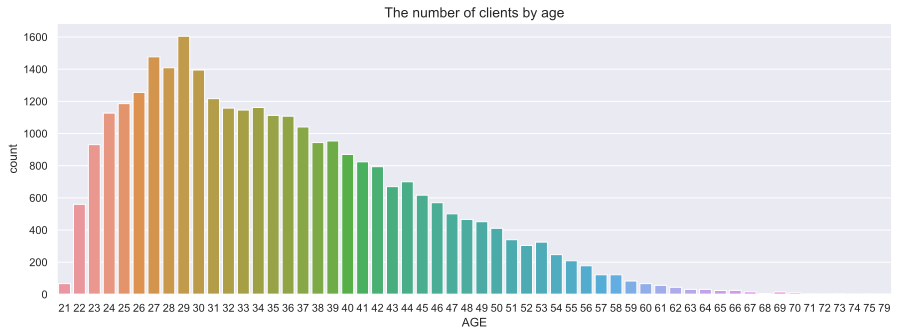

In [13]:
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
sns.set(rc={'figure.figsize':(15, 5)})

ax = sns.countplot(data=data, x='AGE')
ax.set_title('The number of clients by age', fontsize = 14, fontname = 'Arial')

Text(0.5, 1.0, 'The number of clients by age bins')

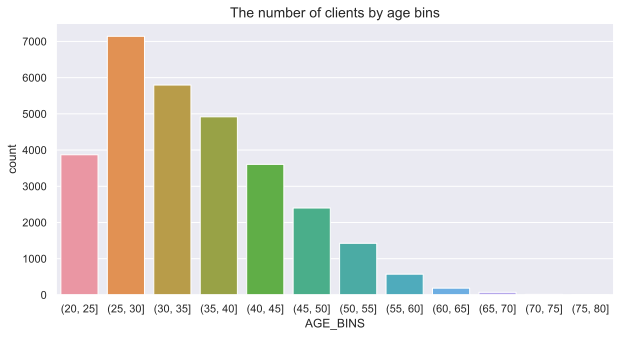

In [14]:
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.countplot(data=data, x='AGE_BINS')
ax.set_title('The number of clients by age bins', fontsize = 14, fontname = 'Arial')

График, содержащий число людей по возрастным диапазоном более сжато отображают информацию, представленную на графике числа клиентов по возрастам. Они имеют одинаковый пиковый диапазон, и линии тренда. Тем не менее 1-й график детальнее описывает выборку, однако эти детали иногда не так важны. Если банк будет выбирать, на какой возраст ориентироваться при формировании новой клиентской базы, либо при написании аналитического отсчета, да график без возрастных диапазонов будет перегружен информацией, поэтому в таких случаях выгодняя использовать график с диапазонами.

Чаще всего в данный банк приходят люди в возрасте 29 лет (таких насчитывается около 1600), и в целом в возрастном диапазоне 26-30 лет (немногим выше 7000)

**Пункт 6**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# создаем словарь, в который закладываем значения количество людей с дефолтом и без
by_default = data['default.payment.next.month'].value_counts().to_dict()
# делаем нормировку полученных значений для процентного соотношения
without_def = int(np.round(by_default[0]/by_default[1]*100))
with_def = int(np.round(by_default[1]/by_default[0]*100))
a = dict(without_def = without_def, with_def = with_def)

Text(0.5, 1.0, 'Процентное отношение людей с дефолтами и без')

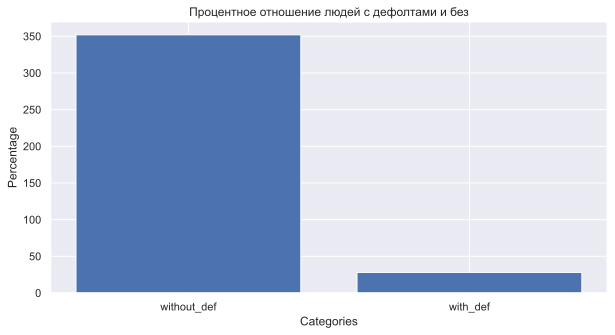

In [16]:
keys = a.keys()
values = a.values()
#
plt.bar(keys, values)
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Процентное отношение людей с дефолтами и без')

Нет, полученная доля людей с дефолтами невелика отноисительно полученной доли людей без дефолтов, так количество людей с дефолтами cоставляет 28% от количества людей без дефолтов. Для наглядности можно было искать долю каждой группы в общем пуле

**Пункт 7**

In [17]:
# Заменим все названия так, чтобы с ними могла работать функция query
data.columns =[column.replace(".", "_") for column in data.columns]

# Создадим 2 Serie, на основании которых будем строить гистограмму и график
dwithout = data.query('default_payment_next_month==0')['LIMIT_BAL']
dwith= data.query('default_payment_next_month==1')['LIMIT_BAL']

Text(0, 0.5, 'Значения функции распределения')

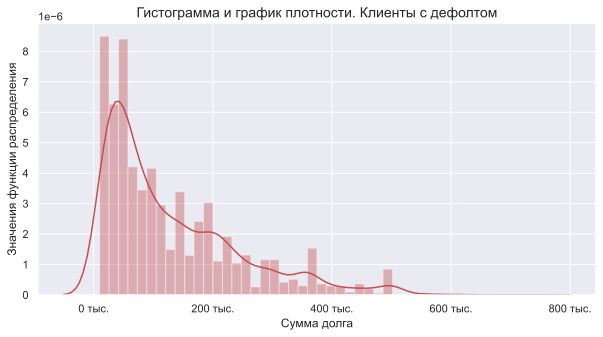

In [18]:
# Поменяем дефолтный размер графика
sns.set(rc={'figure.figsize':(10, 5)})

# Построим гистограмму и график с помощью distpolt, которой в скором времени работать не будет
ax=sns.distplot(a = dwith,hist = True, kde = True, color = 'r')
# установим название и переименуем оси, а также единицы измерения
ax.set_title('Гистограмма и график плотности. Клиенты с дефолтом', fontsize = 14, fontname = 'Arial')
ax.set_xticklabels([0, '0 тыс.','200 тыс.','400 тыс.','600 тыс.','800 тыс.','1M'])
ax.set_xlabel('Сумма долга')
ax.set_ylabel('Значения функции распределения')

Text(0, 0.5, 'Значение плотности распределения')

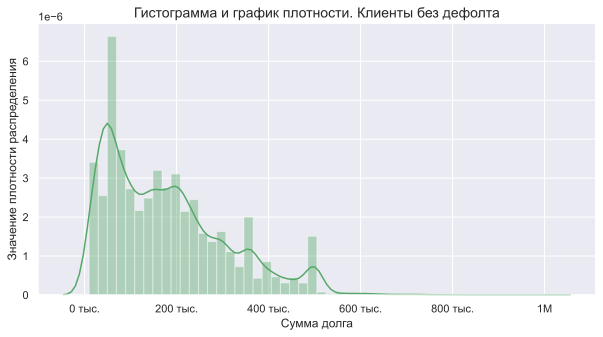

In [19]:
# То же самое для людей без дефолта
sns.set(rc={'figure.figsize':(10, 5)})
ax=sns.distplot(a = dwithout,hist = True, kde = True, color = 'g')
ax.set_xticklabels([0, '0 тыс.','200 тыс.','400 тыс.','600 тыс.','800 тыс.','1M'])
ax.set_title('Гистограмма и график плотности. Клиенты без дефолта', fontsize = 14, fontname = 'Arial')
ax.set_xlabel('Сумма долга')
ax.set_ylabel('Значение плотности распределения')

Text(0, 0.5, 'Значение плотности распределения')

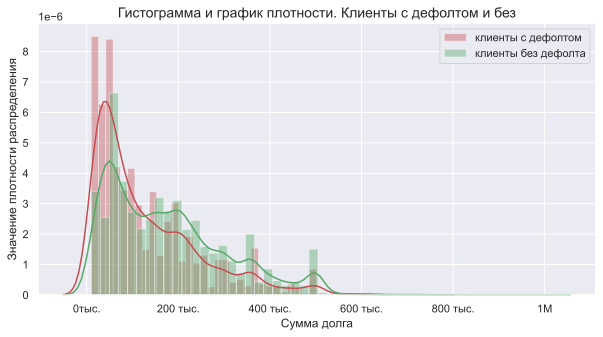

In [26]:
# совместный график
import seaborn as sns
ax=sns.distplot(a = dwith,hist = True, kde = True, color = 'r', label = 'клиенты с дефолтом ')
ax=sns.distplot(a = dwithout,hist = True, kde = True, color = 'g', label = 'клиенты без дефолта')
plt.legend()
ax.set_title('Гистограмма и график плотности. Клиенты с дефолтом и без', fontsize = 14, fontname = 'Arial')
ax.set_xticklabels([0, '0тыс.','200 тыс.','400 тыс.','600 тыс.','800 тыс.','1M'])
ax.set_xlabel('Сумма долга')
ax.set_ylabel('Значение плотности распределения')

На основе графика из предыдущего пункта, ответьте на вопросы:
По кредитам какого размера чаще всего происходят дефолты?  -– 50000 и 20000


На основе графиков плотности распределения, начиная от какой суммы кредита клиентов без дефолта становится больше, чем клиентов с дефолтом? - около 120 тысяч, если судить по точке пересечения линий


Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? – посмотреть на значения, по которым есть зеленые столбики, но красные меньше 1 и меньше зеленых


Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта. 

а) 327680

б) 640000, 660000, 1000000, 700000, 16000, 760000, 780000, 800000, 540000, 570000, 610000, 650000, 670000, 690000, 730000, 750000

In [21]:
x = dict(data.sort_values('LIMIT_BAL').query('default_payment_next_month==0')['LIMIT_BAL'].value_counts(sort=False))
y = dict(data.sort_values('LIMIT_BAL').query('default_payment_next_month==1')['LIMIT_BAL'].value_counts(sort=False))

# Вытаскиваем ключи соответсвующих словарей и переводим их в множество
s = set(y.keys())
p = set(x.keys())

# Далее у нас есть множество сумм счетов по которым были дефолты и покоторым не было. 
# Соответственно, вычтя из одного множества другое получим необходимые значения
def_forever = s-p
never_def = p - s
print(def_forever, never_def)

{327680.0} {640000.0, 660000.0, 1000000.0, 700000.0, 16000.0, 760000.0, 780000.0, 800000.0, 540000.0, 570000.0, 610000.0, 650000.0, 670000.0, 690000.0, 730000.0, 750000.0}


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

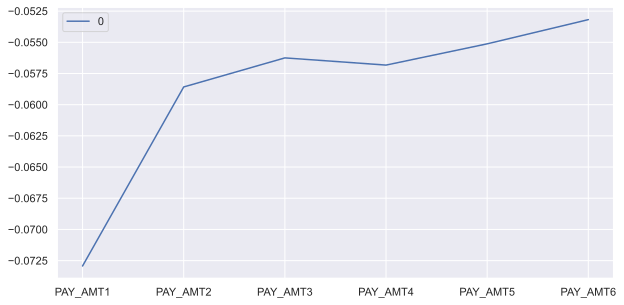

In [22]:
import matplotlib.pyplot as plt
# Составляем матрицу корреляций для всей таблицы относительно столбца по дефолтам
a = data.corrwith(data['default_payment_next_month'])
a = pd.DataFrame(a)
a = a['PAY_AMT1':'PAY_AMT6']
a.plot()
plt.xticks()

Убывание или возрастание корреляции всегда фиксируется по модулю, так как если корреляция стремится к 0, то это говорит о том, что случайные величины некоррелируемы. Поэтому в данном случае можем наблюдать тренд на снижение зависимости между статусом погашения и выплатами по месяцам. 

Напишите функцию, которая возвращает словарь, где ключ - это сумма одобренного кредита, а значение - это вложенный словарь.
В нем по ключу ratio хранится отношение клиентов с дефолтом к тем, у кого его не было, с такой суммой кредитов, а по ключу 
num_clients - общее число клиентов с таким кредитом. Пример элемента словаря: {50000.0 : {'ratio': 0.357, 'num_clients':
3365}. Отсортируйте получившийся словарь по ключу ratio в убывающем порядке. У какого размера кредита наибольшая доля 
клиентов с дефолтом? А сколько в датасете клиентов, по которым посчитана эта доля? Можем ли мы сделать вывод, что в целом 
не стоит одобрять эту сумму для кредита новым клиентам? 


In [23]:
from collections import OrderedDict
# делаем словарь, в котором ключ - уникальное значение кредита, значение - количество человек
a = dict(data['LIMIT_BAL'].value_counts())
# отбираем значения по наличию/отсутствию дефолта и переводим в словарь
x = dict(data.sort_values('LIMIT_BAL').query('default_payment_next_month==0')['LIMIT_BAL'].value_counts(sort=False))
y = dict(data.sort_values('LIMIT_BAL').query('default_payment_next_month==1')['LIMIT_BAL'].value_counts(sort=False))
for key in a:
    # не берем граничные значения, определенные в предыдущем пункте, их рассмотрим двумя строчками ниже
    # находим долю и создаем словарь, куда помещаем долю и количество клиентов
    if key not in never_def and key not in def_forever:
        d = {'ratio': np.round(y[key]/x[key], decimals = 3),'num_clients':a[key]}
    elif key in never_def:
        d = {'ratio': 0.0,'num_clients':a[key]}
    elif key in def_forever:
        d = {'ratio': 1.0,'num_clients':a[key]}
    a[key] =d
OrderedDict(sorted(a.items(), key=lambda x: x[1]['ratio'], reverse = True))




OrderedDict([(740000.0, {'ratio': 1.0, 'num_clients': 2}),
             (327680.0, {'ratio': 1.0, 'num_clients': 1}),
             (40000.0, {'ratio': 0.667, 'num_clients': 230}),
             (10000.0, {'ratio': 0.666, 'num_clients': 493}),
             (20000.0, {'ratio': 0.546, 'num_clients': 1976}),
             (30000.0, {'ratio': 0.545, 'num_clients': 1610}),
             (720000.0, {'ratio': 0.5, 'num_clients': 3}),
             (70000.0, {'ratio': 0.403, 'num_clients': 731}),
             (550000.0, {'ratio': 0.4, 'num_clients': 21}),
             (60000.0, {'ratio': 0.394, 'num_clients': 825}),
             (50000.0, {'ratio': 0.357, 'num_clients': 3365}),
             (100000.0, {'ratio': 0.351, 'num_clients': 1048}),
             (90000.0, {'ratio': 0.342, 'num_clients': 651}),
             (680000.0, {'ratio': 0.333, 'num_clients': 4}),
             (120000.0, {'ratio': 0.327, 'num_clients': 726}),
             (80000.0, {'ratio': 0.301, 'num_clients': 1567}),
             

У какого размера кредита наибольшая доля клиентов с дефолтом? – 327,680 и 740,000

А сколько в датасете клиентов, по которым посчитана эта доля? –3 

Можем ли мы сделать вывод, что в целом не стоит одобрять эту сумму для кредита новым клиентам? - нет, поскольку выборка не репрезентативна, ввиду ограниченности наблюдений

### *4. Друзья друзей (бонусное, 30 баллов) 

1. С помощью VK API скачайте id всех ваших друзей. Убедитесь, что у вас открытый аккаунт, иначе будет ошибка доступа, и ничего скачать не удастся. Если вы не хотите открывать аккаунт, можете выбрать другой (например, аккаунт какой-то известной личности). 
2. Напишите функцию, которая с помощью ```users.get``` и ```friends.get``` по каждому человеку из списка друзей скачивает имя, фамилию, пол, город, дату рождения, образование, количество друзей. Напишите исключение, если у друга закрытый аккаунт, чтобы не включать его в анализ и функция не ломалась. 
3. Постройте график распределения количества друзей по всем друзьям. Создайте переменную ```friends_count_cat```, которая на основе количество друзей принимает значения $1$ - если друзей мало, $2$ - средне, $3$ - много друзей. Определите диапазоны для этих значений на основе графика с распределением. Постройте гистограмму по новой переменной. 
4. Разбейте колонку с образованием на две колонки ```university``` и ```faculty```, в первой сохранив название университета, во второй - название факультета. Удалите исходную колонку с образованием. Сгруппируйте данные по полу и постройте для каждой из групп на одном графике распределения 1) по городам, 2) университету, 3) факультету. Какие наблюдаются различия по этим переменным между девушками и молодыми людьми? 

In [3]:
import requests

# мой номер странички
id = '116690852'  

# версия используемого API
version = '5.126' 

# токен, который получили
token = '4661a6e50b2acb6670d11809795d7c2cc639e5e02c5633e86daac478a6fe7e087d03604b699136875598a'
method = 'friends.get'
parameters = 'user_ids=116690852'

# с помощью метода friends.get скачиваем id друзей
url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url) 
a = response.json()
a = a['response']['items']
a

[425475,
 4452897,
 6517500,
 13606835,
 15035977,
 17310957,
 19747197,
 21377637,
 28967002,
 30894938,
 33785936,
 34493432,
 36857468,
 54928989,
 56764366,
 67898766,
 72946710,
 85533889,
 87945984,
 90157918,
 91242914,
 91303379,
 93199539,
 94838805,
 98584213,
 99078129,
 100450310,
 111193730,
 115079226,
 121337077,
 121838006,
 123874344,
 125638272,
 127171773,
 131747500,
 133651807,
 135231602,
 135665282,
 135908933,
 136808585,
 137719647,
 138155926,
 138599907,
 141216504,
 141227855,
 143021164,
 144681352,
 144729498,
 144959567,
 145878140,
 148119321,
 155631804,
 156973010,
 158096766,
 160399590,
 161217621,
 162560791,
 162886309,
 162983378,
 167621962,
 169164921,
 169605206,
 169869395,
 170221239,
 172396238,
 176412726,
 179954749,
 180081715,
 180556673,
 181227832,
 181571228,
 181940535,
 187345549,
 187872121,
 189268848,
 189774589,
 189970285,
 191941223,
 196895931,
 198123714,
 205437910,
 206324971,
 206371096,
 209064002,
 212655404,
 212788110

In [4]:
#https://oauth.vk.com/blank.html#access_token=4661a6e50b2acb6670d11809795d7c2cc639e5e02c5633e86daac478a6fe7e087d03604b699136875598a&expires_in=86400&user_id=116690852

In [8]:
import time
def vk_download(link_id):
    '''
    Данная функция по id пользователя создает словарь, в котором содержится имя, фамилия, пол, дата рождения, 
    образование и количество друзей в том случае, если аккаунт открытый
    '''
    time.sleep(0.5)
    try:
        response = requests.get('https://api.vk.com/method/users.get?user_ids='+str(link_id)+'&fields=sex, bdate, city, education,followers_count'+'&access_token=4661a6e50b2acb6670d11809795d7c2cc639e5e02c5633e86daac478a6fe7e087d03604b699136875598a&v=5.126')
        infa = response.json()
        if infa['response'][0]['is_closed']:
            pass
        else:
            return infa
    except:
        return 
fr = []
for i in a:
    fr.append([vk_download(i)])
fr

[[{'response': [{'first_name': 'Алексей',
     'id': 425475,
     'last_name': 'Раков',
     'can_access_closed': True,
     'is_closed': False,
     'sex': 2,
     'bdate': '12.8.1982',
     'city': {'id': 459, 'title': 'Реутов'},
     'followers_count': 85,
     'university': 28016,
     'university_name': 'ТФ ЧелГУ',
     'faculty': 1536896,
     'faculty_name': 'Гуманитарный факультет',
     'graduation': 2005,
     'education_form': 'Очное отделение',
     'education_status': 'Выпускник (специалист)'}]}],
 [{'response': [{'first_name': 'Макс',
     'id': 4452897,
     'last_name': 'Нарышкин',
     'can_access_closed': True,
     'is_closed': False,
     'sex': 2,
     'bdate': '8.5',
     'city': {'id': 1, 'title': 'Москва'},
     'followers_count': 292}]}],
 [{'response': [{'first_name': 'Сфера',
     'id': 6517500,
     'last_name': 'Ференц',
     'can_access_closed': True,
     'is_closed': False,
     'sex': 1,
     'bdate': '5.6.1995',
     'city': {'id': 2, 'title': 'Санкт-П

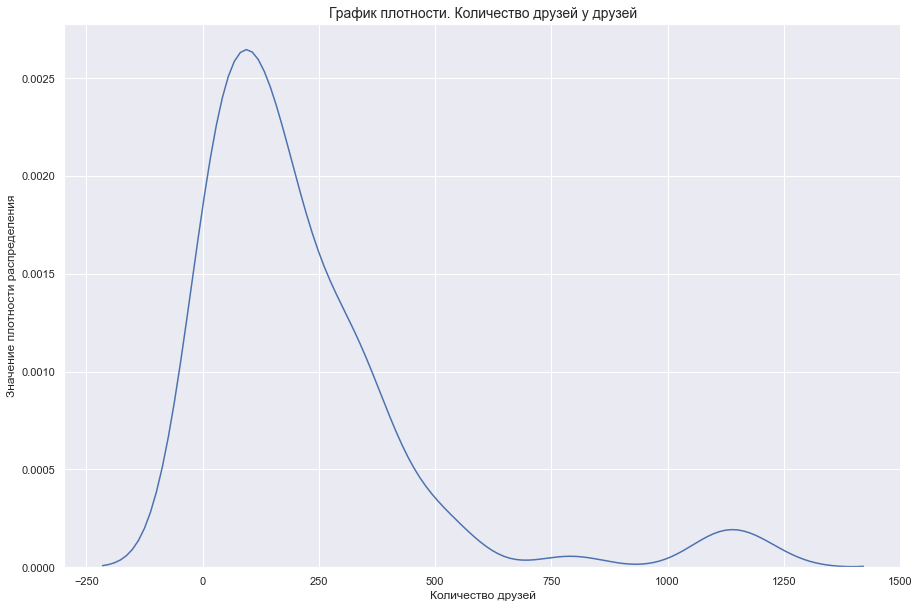

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import collections

# создаем словарь, ключ - фамилия(они все уникальны в данном случае), значение – число подписчиков
num_fr = dict()
for i in range(len(fr)):
    if fr[i][0]!= None:
      num_fr[fr[i][0]['response'][0]['last_name']]=fr[i][0]['response'][0]['followers_count']
# смотрим на разные значения количества друзей по друзьям, подсчитываем количество друзей
fr_num_fr = pd.DataFrame.from_dict(num_fr, orient='index')[0].value_counts(sort=False)
# переводим в словарь, приводим в порядок
fr_num_fr.to_dict()
d = collections.OrderedDict(sorted(fr_num_fr.items()))
k = list(d)

sns.set(rc={'figure.figsize':(15, 10)})
ax = sns.distplot(a = k, hist= False)
ax.set_title('График плотности. Количество друзей у друзей', fontsize = 14, fontname = 'Arial')
ax.set_xlabel('Количество друзей')
ax.set_ylabel('Значение плотности распределения');

In [10]:
friends_count_cat = 0
# пустой словарь из ключей
new_dict = {1:0,2:0, 3:0}
for i in d.keys():
    # разбиваем по количеству друзей в одну из трех категориальных колонок
    if i<=100:
        friends_count_cat = 1
    elif 100<i<=350:
        friends_count_cat = 2
    else:
        friends_count_cat = 3
    new_dict[friends_count_cat] = new_dict[friends_count_cat]+d[i]
new_dict

{1: 45, 2: 57, 3: 15}

<ipython-input-11-27fb4f63ef4e>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  a = plt.bar(new_dict.keys(), new_dict.values(), color= 'ygb')


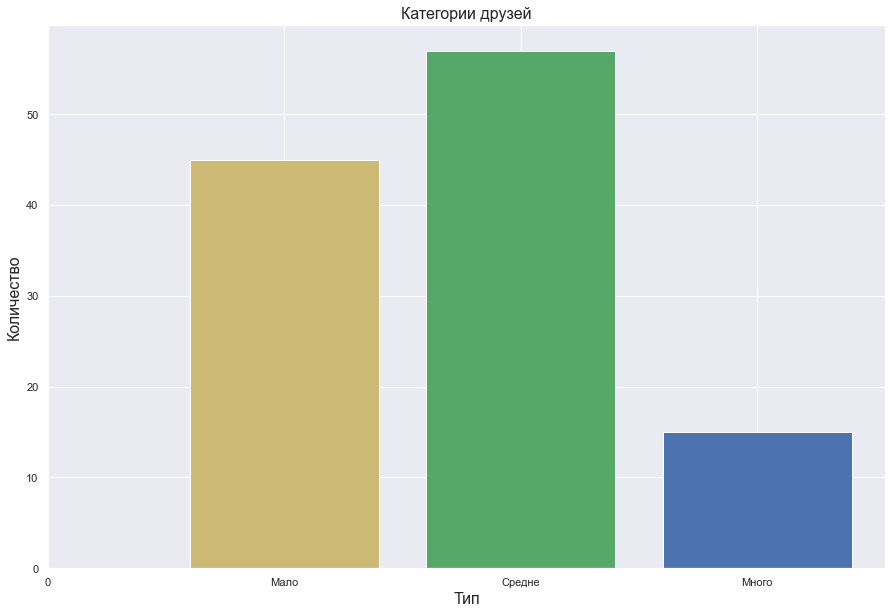

In [11]:
import numpy as np
# строим bar chart меняем значение осей, также изменяем настройки графика
a = plt.bar(new_dict.keys(), new_dict.values(), color= 'ygb') 
plt.title('Категории друзей', fontsize = 16, fontname = 'Arial')
plt.xlabel('Тип', fontsize = 16, fontname = 'Arial')
plt.ylabel('Количество', fontsize = 16, fontname = 'Arial')
plt.xticks(np.arange(4), (0, 'Мало', 'Средне', 'Много'));

In [12]:
spisok_sl = []
collected_data = {}
# как и в прошлый раз делаем таблицу из списка словарей
for i in range(len(fr)):
    collected_data = {}
    if fr[i][0]!= None:
        collected_data['Имя'] = (fr[i][0]['response'][0]['first_name'])
        collected_data['Фамилия'] = (fr[i][0]['response'][0]['last_name'])
        collected_data['Пол'] = (fr[i][0]['response'][0]['sex'])
        if 'university_name' in fr[i][0]['response'][0].keys() and fr[i][0]['response'][0]['university']!=0:
            collected_data['Университет'] = (fr[i][0]['response'][0]['university_name'])
        else:
            collected_data['Университет'] = np.nan
            
        if 'city' in fr[i][0]['response'][0].keys():
            collected_data['Город'] = (fr[i][0]['response'][0]['city']['title'])
            
        else: 
            collected_data['Город'] = np.nan
            
        if 'faculty_name' in fr[i][0]['response'][0].keys() and fr[i][0]['response'][0]['faculty']!=0:
            collected_data['Факультет'] = (fr[i][0]['response'][0]['faculty_name'])
        else:
            collected_data['Факультет'] = np.nan
        spisok_sl.append(collected_data)
fr_df = pd.DataFrame(spisok_sl)
fr_df['Пол'] = fr_df['Пол'].replace([2, 1], ['М','Ж'])
fr_df.head(10)

,Имя,Фамилия,Пол,Университет,Город,Факультет
0,Алексей,Раков,М,ТФ ЧелГУ,Реутов,Гуманитарный факультет
1,Макс,Нарышкин,М,NaN,Москва,NaN
2,Сфера,Ференц,Ж,Ringling College of Art and Design,Санкт-Петербург,Computer Animation
3,Наталья,Порткова,Ж,NaN,Минск,NaN
4,Маргарита,Лынник,Ж,БГУ,NaN,Государственный институт управления и социальн...
5,Инна,Булыга,Ж,КалмГУ им. Б. Б. Городовикова,Элиста,"Факультет математики, физики и информационных ..."
6,Анастасия,Башкирова,Ж,СПбГИКиТ (бывш. СПбГУКиТ),Санкт-Петербург,Факультет экранных искусств
7,Женя,Морина,Ж,NaN,NaN,NaN
8,Алина,Очирова,Ж,СПбГТИ (ТУ),Элиста,Факультет информационных технологий и управлен...
9,Anna,Naryshkinaaa,Ж,NaN,Москва,NaN


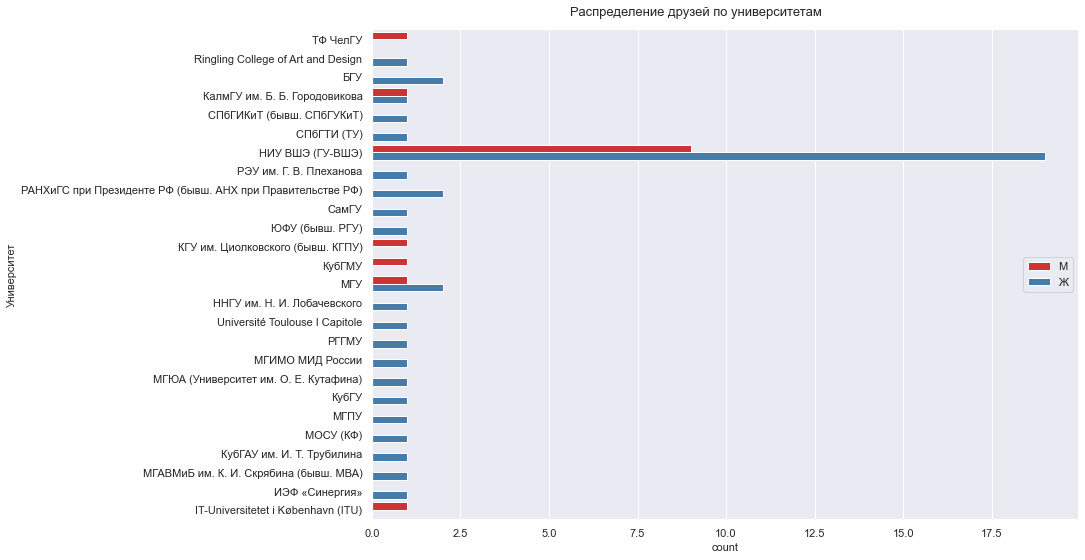

In [21]:
plt.rcParams["axes.labelsize"] = 11
l = sns.catplot(y="Университет", hue = 'Пол', kind="count", palette="Set1", data=fr_df, legend = False)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.subplots_adjust(top=0.94, left = 0.125 )
plt.gca().legend().set_title('')
l.fig.suptitle('Распределение друзей по университетам', fontsize = 13);

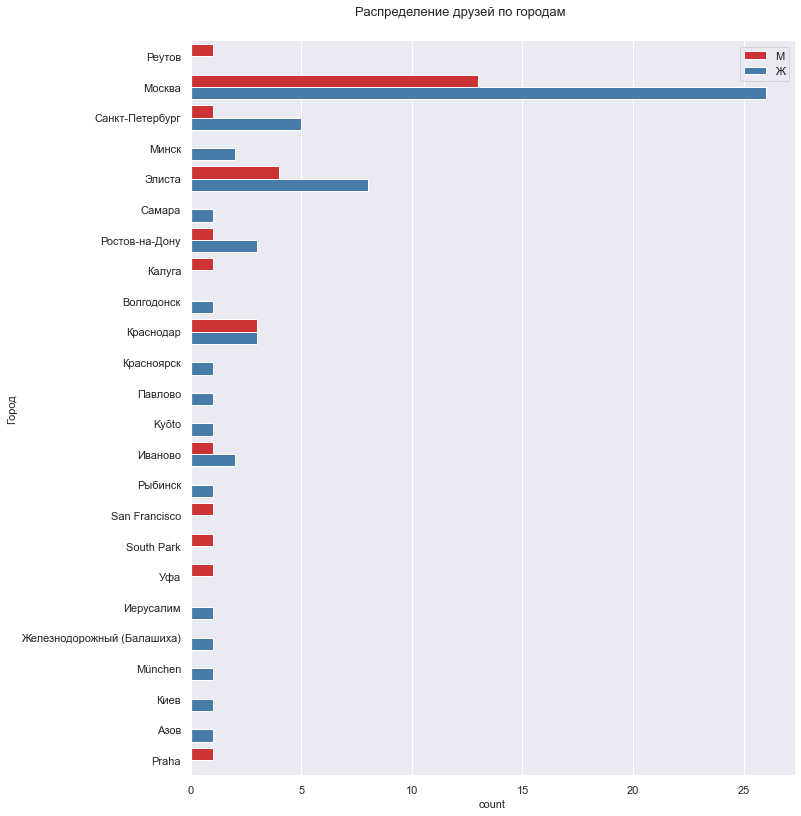

In [18]:
plt.rcParams["axes.labelsize"] = 11
l = sns.catplot(y="Город", hue = 'Пол', kind="count", palette="Set1", data=fr_df, legend = False)
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.subplots_adjust(top=0.94, left = 0.125 )
plt.gca().legend().set_title('')
l.fig.suptitle('Распределение друзей по городам', fontsize = 13);

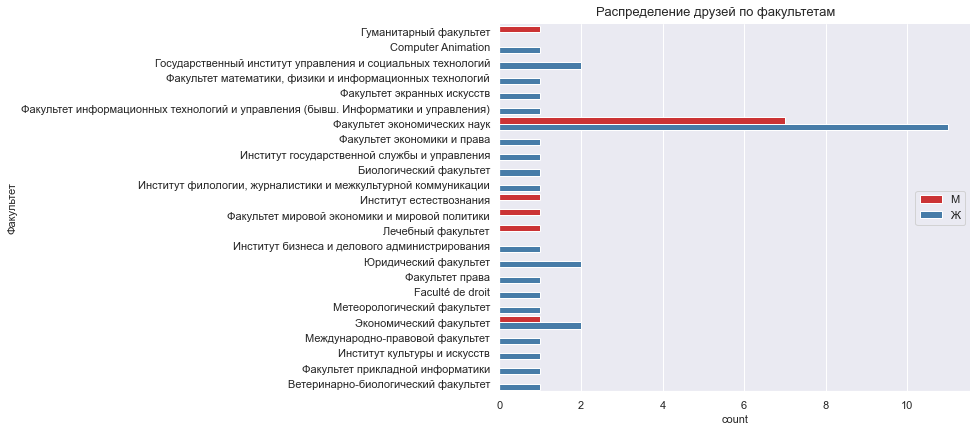

In [19]:
plt.rcParams["axes.labelsize"] = 11
l = sns.catplot(y="Факультет", hue = 'Пол', kind="count", palette="Set1", data=fr_df, legend = False)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.subplots_adjust(top=0.94, left = 0.125 )
plt.gca().legend().set_title('')
l.fig.suptitle('Распределение друзей по факультетам', fontsize = 13);

Поскольку выборка не взвешена, то наблюдается перкос в сторону женщин. Основательных выводов сделать нельзя. Однако можно замететить некоторые интересные тенденции. Друзей мужского пола в университетах, отличных от ВШЭ почти не наблюдается, в то время как женская часть друзей привносит долю разнообразия в выборку, добавляя туда не только московские ВУЗы. Соотношения между поламипо городам примерно одинково. Только в Краснодаре количество друзей обоих полов равно. Стоит отметить, что по факультетам разрыв между мужчинами и женщинами на факультете экономических наук мал по сравнению с разрывом для университета по значению ВШЭ. Девушки учатся на самых разных факультетах, в то время, в то время как большинство парней с ФЭНа.